# 사전작업

In [ ]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, Flatten,Dense, Dropout,MaxPooling2D
from tensorflow.keras.models import load_model
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os

In [ ]:
# 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 데이터 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
model_lenet5_67=Sequential([
    Conv2D(6, (5, 5), input_shape=(28, 28, 1), padding="same",trainable=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    AvgPool2D(2, 2, trainable=False), 
    Conv2D(16, (5, 5),trainable=False),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    AvgPool2D(2, 2,trainable=False), 
    Conv2D(120, (5, 5),trainable=False), 
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Dropout(0.2),
    Flatten(), 
    Dense(84, activation='relu',trainable=False), 
    Dense(10, activation='softmax',trainable=False)
],name="LeNet-5_67")



In [ ]:
model_lenet5_67.load_weights('C:/Users/user/Desktop/cpkt/cp--0067.ckpt')

## 최종모델 손글씨 숫자 인식

In [ ]:
#최종 모델로 검증데이터의 숫자 인식 실행
predictions=model_lenet5_67.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
#인식 결과 입력
predicted_label=[]
for i in range(len(predictions)):
    predicted_label+=[np.argmax(predictions[i])]


In [ ]:
#인식 결과를 이미지로 보여주기 위한 함수
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
class_names=[0,1,2,3,4,5,6,7,8,9]

 * 테스트 데이터 앞 부분 30번째까지의 인식 결과를 확인

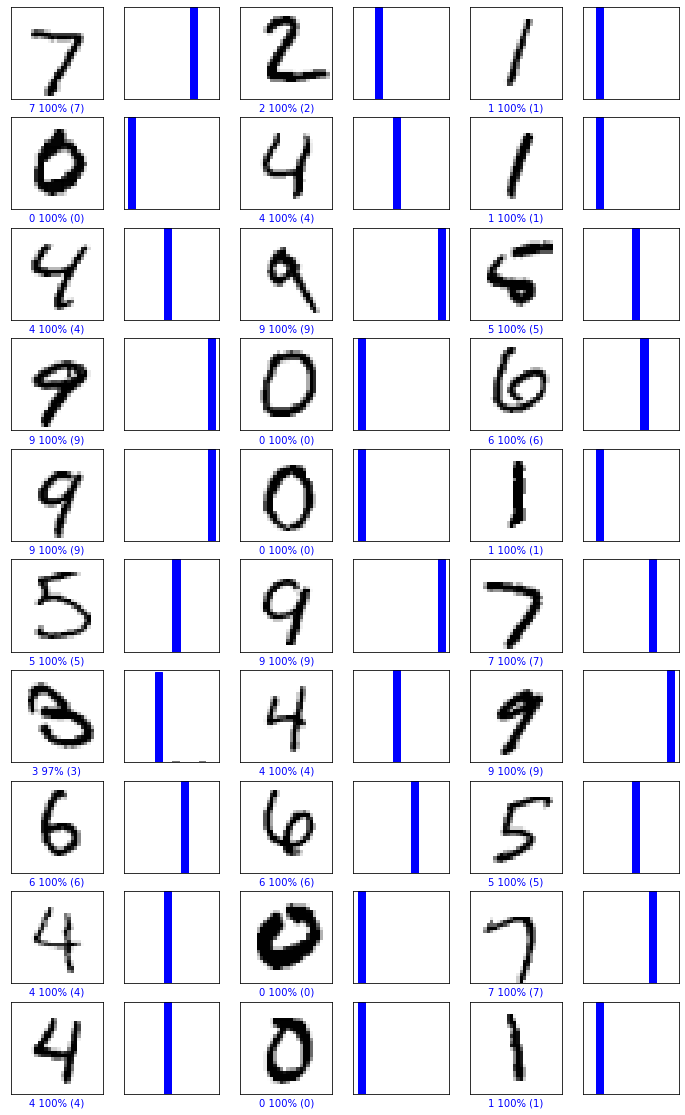

In [ ]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

### 인식 오류 확인

In [ ]:
#오인식 결과 취합
fAns=[]
for i in range(len(test_labels)):
    if predicted_label[i] != test_labels[i]:
        fAns+=[i]

In [ ]:
len(fAns)

60

In [ ]:
len(fAns)/len(test_labels)*100

0.6

 * 10000 개의 데이터 중 인식 결과가 실제와 다른 경우는 60건이며, 이는 오인식이 전체에서 0.6% 발생한 것이다.

In [ ]:
fPred=[]
fTLabel=[]
fTimg=[]

In [ ]:
for i in fAns:
    fPred+=[predictions[i]]
    fTLabel+=[test_labels[i]]
    fTimg+=[test_images[i]]

* 30건의 오인식 사례, 정답에 대한 인식률(파란색 막대), 오답 인식률(붉은색 막대)

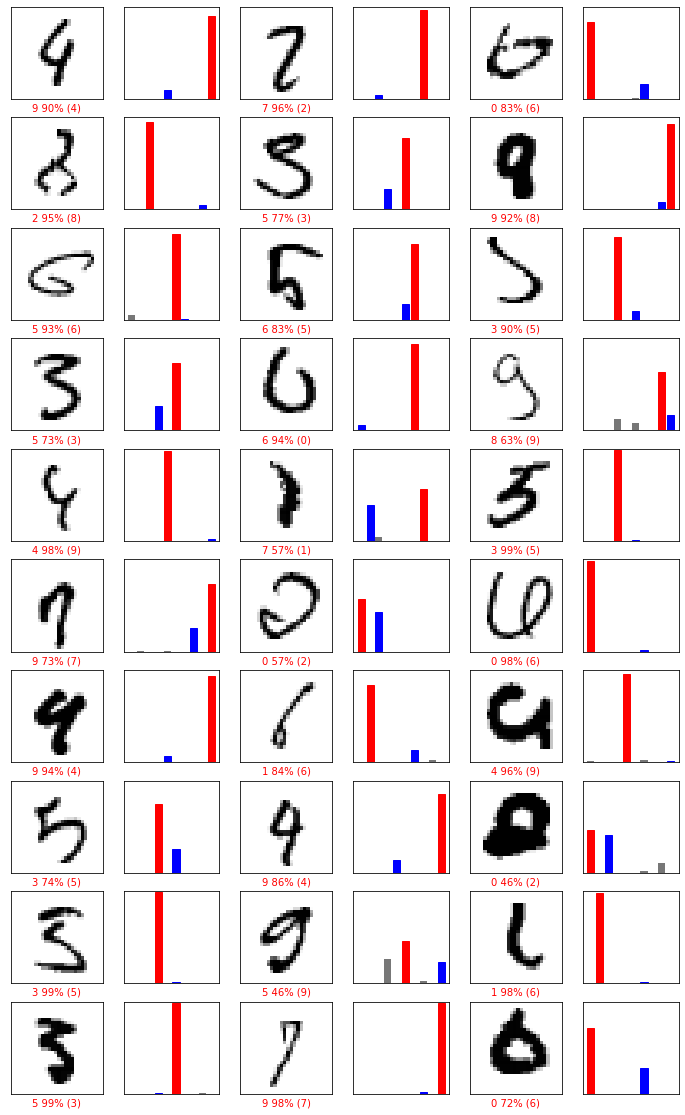

In [ ]:
num_rows = 20
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, fPred, fTLabel, fTimg)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, fPred, fTLabel)
plt.show()

In [ ]:
falses=[0,0,0,0,0,0,0,0,0,0]
for i in fTLabel:
    falses[i]+=1

In [ ]:
fMax=max(falses)

 * 오인식된 숫자의 분포
  * 6이 11건으로 오인식된 경우가 가장 많았다. (전체의 18.33%)
  * 0과 1이 단 2건으로 오인식 된 경우가 가장 적었다. (3.33%)

(0.0, 12.0)

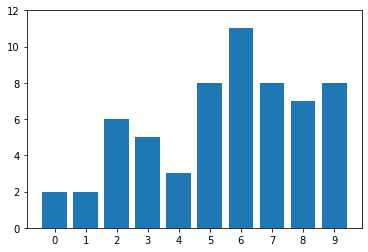

In [ ]:
plt.xticks([0,1,2,3,4,5,6,7,8,9])
x=range(10)
plt.bar(x,falses)
plt.ylim([0, fMax+1])

 * 오답의 분포
  * 9라고 오답을 도출한 경우가 9건으로 제일 많았다. (15%)
  * 1이라고 오답을 도출한 경우가 2건으로 제일 적었다. (3.33%)

(0.0, 10.0)

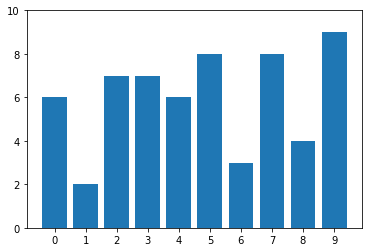

In [ ]:
trues=[0,0,0,0,0,0,0,0,0,0]
for i in range(len(fPred)):
    trues[np.argmax(fPred[i])]+=1

tMax=max(trues)

plt.xticks([0,1,2,3,4,5,6,7,8,9])
x=range(10)
plt.bar(x,trues)
plt.ylim([0, tMax+1])